In [1]:
# ADS project- re-edited for submission

#### ADS_ Project data ...
### As a data analysis project

#### Asking questions...


In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp 
import numpy as np
from sklearn import preprocessing
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings("ignore")

# Set jupyter's max row display
pd.set_option('display.max_row', 1000)

# Set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

plt.style.use('ggplot')
%matplotlib inline

In [3]:
#data_2017 = pd.read_csv('../input/2017_Batch.xlsx')
#data_2017.head()
dp_ads = pd.read_csv('Data_ADS_Project_Total_CleanedAug2023.csv')
dp_ads.head() 

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN
1,2.0,17/02/2023,M,"English, Yoruba, Pidgin English",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN
3,4.0,17/02/2023,M,"English, Hausa, Bura",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN
4,6.0,17/02/2023,M,"English, Pidgin English, Gbagyi",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN


# How many pupils were surveyed in this project?

In [4]:
dp_ads.shape

(1005, 17)

#### 1004 students (because of header row)
#### 17 columns (...for now)

### What do we have in this dataset?


In [5]:
list(dp_ads)


['Serial Number',
 'Date of entry',
 'Gender',
 'Languages Spoken',
 'Class',
 'Year of Entry',
 'Language with Parents',
 'Language with Siblings',
 'Language with Friends',
 'Language in School',
 'First English at ',
 'Comprehension 1',
 'Comprehension 2',
 'Comprehension 3',
 'Comprehension 4',
 'Comprehension 5',
 'Unnamed: 16']

### Are there missing values in this dataset?

In [6]:
#data_2017.isna().sum()
dp_ads.isna().sum()

Serial Number               11
Date of entry                6
Gender                       4
Languages Spoken             3
Class                        1
Year of Entry               40
Language with Parents        3
Language with Siblings      11
Language with Friends        5
Language in School          12
First English at             6
Comprehension 1             23
Comprehension 2             33
Comprehension 3             37
Comprehension 4             47
Comprehension 5             46
Unnamed: 16               1005
dtype: int64

In [7]:
# need to drop this column "Unnamed: 16". No data at all
dp_ads.drop(['Unnamed: 16'], axis = 1)

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1
1,2.0,17/02/2023,M,"English, Yoruba, Pidgin English",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1
3,4.0,17/02/2023,M,"English, Hausa, Bura",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1
4,6.0,17/02/2023,M,"English, Pidgin English, Gbagyi",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NaN,26-01-2023,F,Tiv,6,NaN,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1
1001,NaN,26-01-2023,M,Gbagyi,3,2020.0,"English,Gbagyi,Pidgin, Hausa",NaN,Pidgin English,English,Playgroup,0,NaN,0,0,0
1002,NaN,26-01-2023,F,Yoruba.,3,NaN,"English,Pidgin English, Hausa",Ebglish,English,English,Playgroup,0,1,0,1,0
1003,NaN,2023-07-02,M,Gbagyi,3,2020.0,English,English,English,English,Primary School,1,1,1,0,1


In [8]:
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Serial Number           994 non-null    float64
 1   Date of entry           999 non-null    object 
 2   Gender                  1001 non-null   object 
 3   Languages Spoken        1002 non-null   object 
 4   Class                   1004 non-null   object 
 5   Year of Entry           965 non-null    float64
 6   Language with Parents   1002 non-null   object 
 7   Language with Siblings  994 non-null    object 
 8   Language with Friends   1000 non-null   object 
 9   Language in School      993 non-null    object 
 10  First English at        999 non-null    object 
 11  Comprehension 1         982 non-null    object 
 12  Comprehension 2         972 non-null    object 
 13  Comprehension 3         968 non-null    object 
 14  Comprehension 4         958 non-null    

### What to do about the missing data?


In [9]:
# come back to this

### What to do to correct wrong entries in Languages spoken column...


In [10]:
#data_2017['PERMANENT LOCATION (STATE)'].value_counts()
dp_ads['Languages Spoken'].value_counts()

English, Gbagyi                           147
Gbagyi                                    109
English                                    97
English, Tiv                               61
English, Hausa                             51
Gbagyi, English                            42
Hausa                                      42
Tiv                                        42
English, Yoruba                            31
English, Igbo                              27
Gbagyi, Hausa                              22
Fulfulde                                   14
Yoruba, English                            13
Igbo                                       13
English, Igala                             10
English, Gede                              10
English, Gbagyi , Hausa                     8
Gede                                        8
Yoruba                                      8
Gbagyi, Pidgin English, Hausa               8
Bassa                                       8
English, Hausa, Gede              

### English is a given, so all language combinations should include English... 
#### To correct this will require a long input statement


In [11]:
# To correct the wrong entries of English either spelling or missing ... 
#data_2017['PERMANENT LOCATION (STATE)'] = data_2017['PERMANENT LOCATION (STATE)'] .map({'WESTBENGAL':'WEST BENGAL',
#'WEST BENGAL':'WEST BENGAL', 'West Bengal':'WEST BENGAL', 'WEST-BENGAL':'WEST BENGAL',
#' WEST BENGAL':'WEST BENGAL', 'WB':'WEST BENGAL','West bengal':'WEST BENGAL', 'WEST BINGAL': 'WEST BENGAL',
#'               WEST BENGAL':'WEST BENGAL', '                WEST BENGAL':'WEST BENGAL','WEST BENGAL.':'WEST BENGAL',
#'               JHARKHAND':'JHARKHAND','BIHAR':'BIHAR','TRIPURA':'TRIPURA','JHARKHAND':'JHARKHAND','UTTARAKHAND':'UTTARAKHAND',
#'DELHI':'DELHI','INDIA':'INDIA'})
#data_2017['PERMANENT LOCATION (STATE)'].value_counts()

dp_ads['Languages Spoken'] = dp_ads['Languages Spoken'].map({'English, Gbagyi':'English, Gbagyi',
                                                             'Gbagyi': 'English, Gbagyi',
                                                             'English': 'English',
                                                             'English, Tiv':'English, Tiv',
                                                             'English, Hausa':'English, Hausa',
                                                             'Hausa':'English, Hausa',
                                                             'Tiv':'English, Tiv',
                                                             'Gbagyi, English':'English, Gbagyi',
                                                             'English, Yoruba':'English, Yoruba',
                                                             'English, Igbo':'English, Igbo',
                                                             'Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'Fulfulde':'English, Fulfulde',
                                                             'Igbo':'English, Igbo',
                                                             'Yoruba, English':'English, Yoruba',
                                                             'English, Igala':'English, Igala',
                                                             'English, Gede':'English, Gede',
                                                             'Gede':'English, Gede',
                                                             'Gbagyi, Pidgin English, Hausa':'English, Gbagyi, Hausa, Pidgin English',
                                                             'Bassa':'English, Bassa',
                                                             'Yoruba':'English, Yoruba',
                                                             'English, Gbagyi , Hausa':'English, Gbagyi, Hausa',
                                                             'English, Hausa, Gede':'English, Hausa, Gede',
                                                             'English, Bassa':'English, Bassa',
                                                             'Pidgin English, Hausa':'English, Hausa, Pidgin English',
                                                             'English, Idoma':'English, Idoma',
                                                             'English, Gbagyi':'English, Gbagyi',
                                                             'Igala':'English, Igala',
                                                             'Mada':'English, Mada',
                                                             'English, Tiv, Hausa':'English, Hausa, Tiv',
                                                             'Gade':'English, Gede',
                                                             'English, Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'Bajju':'English, Bajju',
                                                             'Jaba':'English, Jaba',
                                                             'Igbo, English':'English,Jaba',
                                                             'English,Hausa, Atarkar':'English, Atarkar, Hausa',
                                                             'Pidgin English, Gbagyi':'English, Gbagyi, Pidgin English',
                                                             'English, Gade':'English, Gede',
                                                             'Tiv, English':'English, Tiv',
                                                             'English, Hausa, Gbagyi':'English, Gbagyi, Hausa',
                                                             'Idoma':'English, Idoma',
                                                             'English, Fulfulde':'English, Fulfulde',
                                                             'English, Hausa, Idoma':'English, Hausa, Idoma',
                                                             'Bura':'English, Bura',
                                                             'English, Hausa, Tiv':'English, Hausa, Tiv',
                                                             'English, Edo':'English, Edo',
                                                             'English, Igede':'English, Igede',
                                                             'Hausa, English':'English, Hausa',
                                                             'Pidgin English':'English, Pidgin English',
                                                             'Angas':'English, Angas',
                                                             'Awo':'English, Awo',
                                                             'Pidgin English, Gede':'English, Gede, Pidgin English,',
                                                             'English, TIV':'English, Tiv',
                                                             'English, Tiv':'English, Tiv',
                                                             'Tiv, Hausa, Pidgin English':'English, Hausa, Pidgin English, Tiv',
                                                             'English, Tarok':'English, Tarok',
                                                             'Ahoe':'English, Ahoe',
                                                             'English, Hausa, Bura':'English, Bura, Hausa',
                                                             'Ebira':'English, Ebira',
                                                             'Gbagyi, Mada':'English, Gbagyi, Mada',
                                                             'English, Igon':'English, Igon',
                                                             'Englis, Hausa, Tiv':'English, Hausa, Tiv',
                                                             'Englis, Jabba , Hausa':'English, Hausa, Jaba',
                                                             'English, Madar':'English, Mada',
                                                             'Gbagyi, Gede':'English, Gbagyi, Gede',
                                                             'Kurama':'English, Kurama',
                                                             'Gbagyi,English,Hausa, Gade':'English, Gbagyi, Gede, Hausa',
                                                             'English, Amo, Hausa':'English, Amo, Hausa',
                                                             'Bassa, Gbagyi, English':'English, Bassa, Gbagyi',
                                                             'Nupe':'English, Nupe',
                                                             'English, Eggon':'English, Eggon',
                                                             'English, Pidgin English, Tiv':'English, Pidgin English, Tiv',
                                                             'English, Ron':'English, Ron',
                                                             'English, Gede, Fulfulde, Hausa':'English, Fulfulde, Gede, Hausa',
                                                             'English':'English',
                                                             'Gbagyi, Yoruba':'English, Gbagyi, Yoruba',
                                                             'Yoruba, Igbo':'English, Igbo, Yoruba',
                                                             'Kantana':'English, Kantana',
                                                             'English, Chawel':'English, Chawai',
                                                             'Yoruba ,English':'English, Yoruba',
                                                             'English, Ahor, Hausa':'English, Ahor, Hausa',
                                                             'English,Gbagyi,Hausa, Mada':'English, Gbagyi, Hausa, Mada',
                                                             'English, Akwa Ibom':'English, Akwa Ibom',
                                                             'English, Kilber':'English, Kilber',
                                                             'Attakar':'English, Attakar',
                                                             'English, Kaduna':'English, Kaduna',
                                                             'Basahge':'English, Bassange',
                                                             'English,Gbagyi,Hausa,Gade':'English, Gbagyi, Gede, Hausa',
                                                             'English, Hausa, Gusawa':'English, Gusawa, Hausa',
                                                             'English, Ijona, Pidgin English':'English, Ijon, Pidgin English',
                                                             'English, Hausa, Bajju':'English, Bajju, Hausa',
                                                             'Tiv':'English, Tiv',
                                                             'Hausa, Fulfude':'English, Fulfulde, Hausa',
                                                             'English, Hausa, Ebira':'English, Ebira, Hausa',
                                                             'English, Hausa, Eggon':'English, Eggon, Hausa',
                                                             'Kwala':'English, Kwala?',
                                                             'Nupe, English':'English, Nupe',
                                                             'Tiv, Gbagyi':'English, Gbagyi, Tiv',
                                                             ' English':'English',
                                                             'Ngas':'English, Ngas',
                                                             'Pidgin English, Gede, Hausa':'English, Gede, Hausa, Pidgin English',
                                                             'English,Pidin English,Hausa, Gede':'English, Gede, Hausa, Pidgin English',
                                                             'Edo':'English, Edo',
                                                             'English, Jaba':'English, Jaba',
                                                             'English, Hausa, Gbagyi, Pidgin English':'English, Gbagyi, Hausa, Pidgin English',
                                                             'English,Hausa,Fulfude':'English, Fulfulde, Hausa',
                                                             'Gade, English':'English, Gede',
                                                             'English,  Tiv, Hausa':'English, Hausa, Tiv',
                                                             'English ,Hausa, Gbagyi, Koro':'English, Gbagyi, Hausa, Koro',
                                                             'English, Yoruba, Gbagyi':'English, Gbagyi, Yoruba',
                                                             'English, Fulfulde, Hausa':'English, Fulfulde, Hausa',
                                                             'English, Hausa, Gbagyi, Afo':'English, Afo, Gbagyi, Hausa',
                                                             'English, Ngas':'English, Ngas',
                                                             'Gbagyi':'English, Gbagyi',
                                                             'Arago':'English, Arago',
                                                             'Bassa, English':'English, Bassa',
                                                             'Pidgin English, Hausa , Gede':'English, Gede, Hausa, Pidgin English',
                                                             'English, Yoruba, Pidgin English':'English, Pidgin English, Yoruba',
                                                             'English, Pidgin English, Gbagyi':'English, Gbagyi, Pidgin English',
                                                             'Hausa, Tiv':'English, Hausa, Tiv',
                                                             'Yoruba ,English, Fulfulde':'English, Fulfulde, Yoruba',
                                                             'Gbagyi, Pidgin English':'English, Gbagyi, Pidgin English',
                                                             'English, Cross River':'English, Cross River',
                                                             'Gbagyi,Hausa, English':'English, Gbagyi, Hausa',
                                                             ' Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'English, Kataf':'English, Kataf',
                                                             'Pidgin English, Hausa, Tiv':'English, Hausa, Pidgin English, Tiv',
                                                             'Boju':'English, Boju',
                                                             'English, Pidgin English, Gede':'English, Gede, Pidgin English',
                                                             'English, Basange':'English, Bassa Nge',
                                                             'Cantana':'English, Kantana',
                                                             'Hausa, English, Gbagyi':'English, Gbagyi, Hausa',
                                                             'Koro':'English, Koro',
                                                             'English, Margi': 'English, Margi',
                                                             'Gede, English':'English, Gede',
                                                             'Hausa, Fulfulde':'English, Fulfulde, Hausa',
                                                             'English, Ibibio(Akwa-Ibom':'English, Ibibio',
                                                             'Narm, Gbagyi':'English, Gbagyi, Narm',
                                                             'English, Hausa, Tarok':'English, Hausa, Tarok',
                                                             'Efik':'English, Efik',
                                                             'English, Bassa, Hausa':'English, Bassa, Hausa',
                                                             'Gbagyi,Hausa,Mada, English':'English, Gbagyi, Hausa, Mada',
                                                             'Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'English,Gbagyi, Mada':'English, Gbagyi, Mada',
                                                             'Chala':'English, Chala',
                                                             'Gbaagyi':'English, Gbagyi',
                                                             'English, Hausa, Fulani':'English, Fulfulde, Hausa',
                                                             'Igala, English':'English, Igala',
                                                             'Pidgin English, Hausa, Chawai':'English, Chawai, Hausa, Pidgin English',
                                                             'English, Ganagana':'English, Ganagana',
                                                             'Pidgin English, Hausa, Gbagyi':'English, Gbagyi, Hausa, Pidgin English',
                                                             'Englisha, Igbira':'English, Ebira',
                                                             'Gbagyi, Gade':'English, Gbagyi, Gede',
                                                             'Gbagy':'English, Gbagyi',
                                                             'English,Gbagyi, Tiv':'English, Hausa, Pidgin English, Tiv',
                                                             'Pidgin English,  Hausa, Tiv':'English, Hausa, Pidgin English, Tiv',
                                                             'English,Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             '2018':'',
                                                             'English, Chawai':'English, Chawai',
                                                             'English, Tiv, Hausa':'English, Hausa, Tiv',
                                                             'English, Pidgin English':'English, Pidgin English',
                                                             'Katab':'English, Katab',
                                                             'Gbagyi  , Hausa':'English, Gbagyi, Hausa',
                                                             'English,Hausa, Adara':'English, Adara, Hausa',
                                                             'Hausa,Gbagyi, English':'English, Gbagyi, Hausa',
                                                             'English, Mada':'English, Mada',
                                                             'English, Hausa, Gwandara':'English, Gwandara, Hausa',
                                                             'Yoruba.':'English, Yoruba',
                                                             'English,Hausa, Yoruba':'English, Hausa, Yoruba',
                                                             'Gbagyi, Koro':'English, Gbagyi, Koro',
                                                             'Kwol':'English, Kwol'
                                                            })
                                                                                
 # Took over 2 hours!!

In [12]:
# Redo value counts with languages processed...20-10-2023
dp_ads['Languages Spoken'].value_counts()

English, Gbagyi                           300
English, Tiv                              108
English                                    98
English, Hausa                             95
English, Yoruba                            54
English, Gbagyi, Hausa                     43
English, Igbo                              40
English, Gede                              27
English, Fulfulde                          17
English, Igala                             16
English, Bassa                             15
English, Hausa, Tiv                        10
English, Gbagyi, Hausa, Pidgin English     10
English, Idoma                              9
English, Mada                               7
English, Hausa, Gede                        7
English, Hausa, Pidgin English              6
English, Gbagyi, Pidgin English             5
English, Hausa, Pidgin English, Tiv         5
English, Fulfulde, Hausa                    4
English, Bajju                              4
English, Jaba                     

Text(0.5, 1.0, 'Language varieties spoken by Primary School Pupils Surveyed')

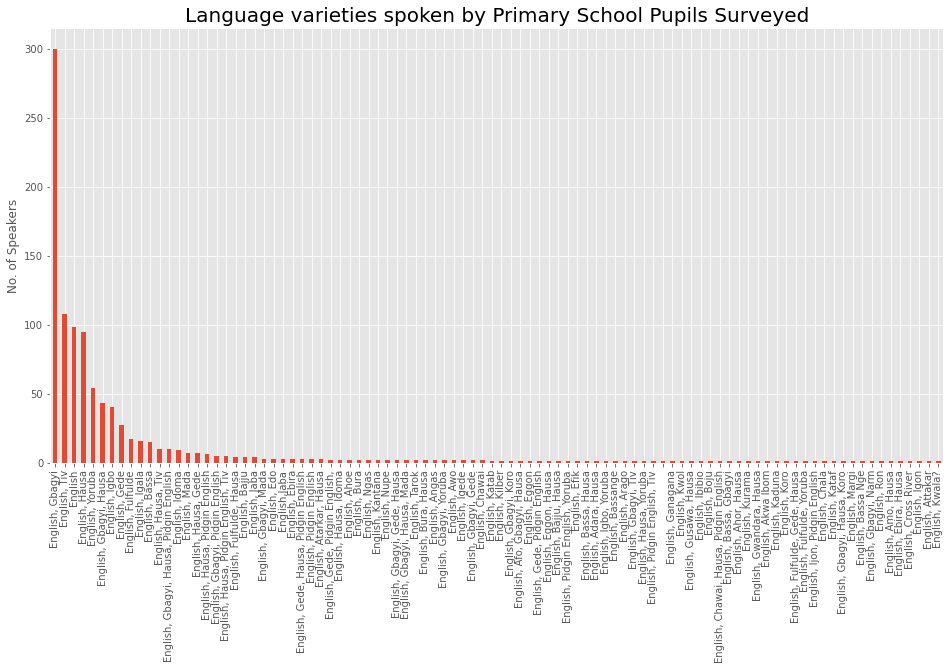

In [13]:
# Neater output...
# Time to plot

#subplot = data_2017['PERMANENT LOCATION (STATE)'].value_counts().plot(kind='barh',figsize=(12,8))
#subplot.set_ylabel('')
#subplot.set_title('State-wise Distribution of Students', fontsize = 20)

subplot = dp_ads['Languages Spoken'].value_counts().plot(kind='bar',figsize=(16,8))
subplot.set_ylabel('No. of Speakers')
subplot.set_title('Language varieties spoken by Primary School Pupils Surveyed', fontsize = 20)


#### This graph doesnt really say much more than that "English, Gbagyi" is the language combination with the highest number of speakers. 300!  This is followed by  "English, Tiv"; "English" (only); and "English, Hausa" with about 100 speakers in each group. 

#### We need to find a way to show the unique languages listed here...

In [14]:
#df[["Score1", "Score2", "Score3"]] = df["score"].str.split(",", expand=True)
dp_ads[["Lang1", "Lang2", "Lang3", "Lang4"]] = dp_ads["Languages Spoken"].str.split(",", expand=True)
# ref...https://medium.com/@akaivdo/how-to-split-one-column-to-multiple-columns-in-pandas-3c857b47fbde

In [15]:
dp_ads.head()

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16,Lang1,Lang2,Lang3,Lang4
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN,English,Yoruba,None,None
1,2.0,17/02/2023,M,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN,English,Pidgin English,Yoruba,None
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN,English,Igbo,None,None
3,4.0,17/02/2023,M,"English, Bura, Hausa",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN,English,Bura,Hausa,None
4,6.0,17/02/2023,M,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN,English,Gbagyi,Pidgin English,None


#### Having split the Languages Spoken column into Lang1, Lang2, Lang3, Lang 4, with Lang1 being English as the official language... Now to do a summary of other languages...

In [16]:
languages1 = dp_ads["Lang1"].nunique()
print("1st language column: ", languages1)

languages2 = dp_ads["Lang2"].nunique()
print("2nd language column: ",languages2)

languages3 = dp_ads["Lang3"].nunique()
print("3rd language column: ",languages3)

languages4 = dp_ads["Lang4"].nunique()
print("4th language column: ",languages4)


1st language column:  2
2nd language column:  59
3rd language column:  11
4th language column:  7


###### Can this be? 80 different languages. But 1st language column should have been 1. 
###### 1 unique language - English.

In [17]:
# with 80(?) total distinct languages, how best can i do this...
lang_list1 = dp_ads["Lang1"].unique()
lang_list1

array(['English', nan, ''], dtype=object)

In [18]:
# with 59 in column 2...
lang_list2 = dp_ads["Lang2"].unique()
lang_list2

array([' Yoruba', ' Pidgin English', ' Igbo', ' Bura', ' Gbagyi',
       ' Idoma', ' Ijon', None, ' Hausa', ' Tiv', nan, ' Akwa Ibom',
       ' Igala', ' Amo', ' Tarok', ' Fulfulde', ' Ngas', ' Mada',
       ' Cross River', ' Bassa', ' Eggon', ' Igon', ' Kilber', ' Igede',
       ' Gede', ' Ebira', ' Nupe', ' Jaba', ' Bassange', ' Koro',
       ' Kantana', ' Ganagana', ' Gusawa', 'Jaba', ' Chawai', ' Attakar',
       ' Kurama', ' Bajju', ' Chala', ' Ahor', ' Bassa Nge', ' Afo',
       ' Arago', ' Kwala?', ' Gwandara', ' Kwol', ' Kaduna', ' Edo',
       ' Angas', ' Ahoe', ' Ron', ' Boju', ' Awo', ' Efik', ' Ibibio',
       ' Kataf', ' Adara', ' Atarkar', ' Margi', ' Katab'], dtype=object)

##### This implies about 60 unique languages in the column titled "Language spoken with Parents"...

In [19]:
# can i do a graph with this?
dp_ads['Lang2'].value_counts()


 Gbagyi            373
 Hausa             126
 Tiv               108
 Yoruba             54
 Igbo               41
 Gede               33
 Fulfulde           23
 Bassa              17
 Igala              16
 Idoma               9
 Mada                7
 Bajju               5
 Pidgin English      5
 Ebira               4
 Bura                4
 Jaba                4
Jaba                 3
 Atarkar             3
 Chawai              3
 Edo                 3
 Ngas                2
 Tarok               2
 Ahoe                2
 Kantana             2
 Eggon               2
 Nupe                2
 Igede               2
 Angas               2
 Awo                 2
 Kwala?              1
 Kurama              1
 Kilber              1
 Kataf               1
 Adara               1
 Amo                 1
 Arago               1
 Bassange            1
 Katab               1
 Ijon                1
 Afo                 1
 Ganagana            1
 Efik                1
 Boju                1
 Ahor      

Text(0.5, 1.0, 'Languages spoken by Primary School Pupils')

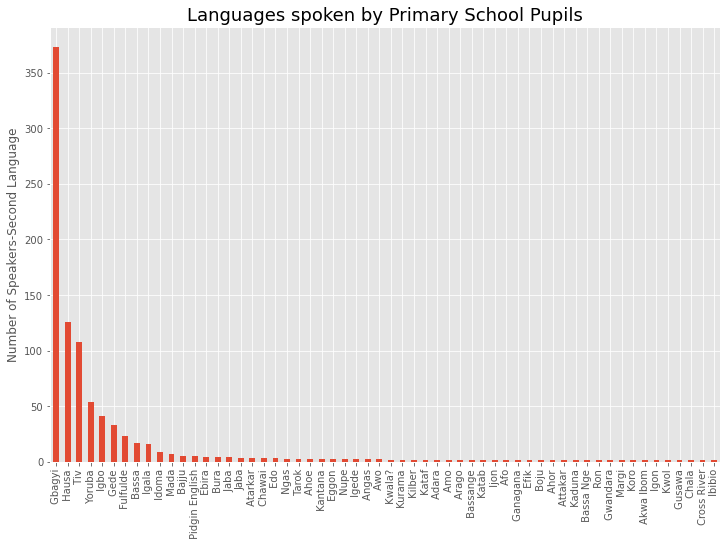

In [20]:
lang2plot = dp_ads['Lang2'].value_counts().plot(kind='bar',figsize=(12,8))
lang2plot.set_ylabel('Number of Speakers-Second Language')
lang2plot.set_title('Languages spoken by Primary School Pupils', fontsize = 18)

In [21]:
# Language Column 3 
dp_ads['Lang3'].value_counts()


 Hausa             78
 Pidgin English    20
 Gede              12
 Tiv               12
 Yoruba             6
 Mada               3
 Gbagyi             2
 Idoma              2
 Narm               1
 Koro               1
Name: Lang3, dtype: int64

Text(0.5, 1.0, 'Languages Spoken by Primary School Pupils')

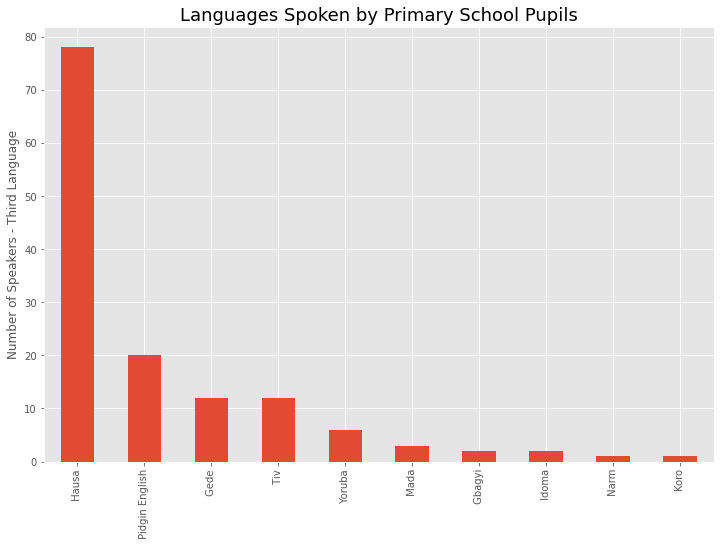

In [22]:
lang3plot = dp_ads['Lang3'].value_counts().plot(kind='bar',figsize=(12,8))
lang3plot.set_ylabel('Number of Speakers - Third Language')
lang3plot.set_title('Languages Spoken by Primary School Pupils', fontsize = 18)

In [23]:
# 4th Language column
dp_ads['Lang4'].value_counts()


 Pidgin English    14
 Tiv                5
 Hausa              4
 Mada               2
                    2
 Koro               1
Name: Lang4, dtype: int64

In [24]:
#dp_ads['Lang4']==


Text(0.5, 1.0, 'Languages Spoken by Primary School Pupils')

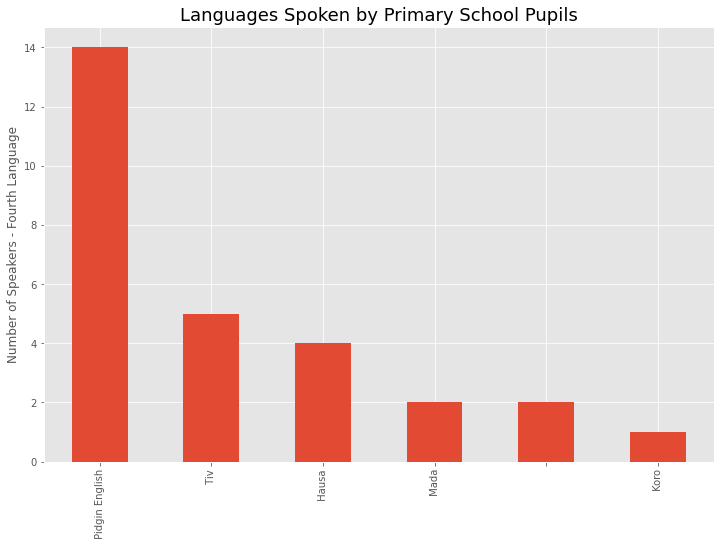

In [25]:
lang4plot = dp_ads['Lang4'].value_counts().plot(kind='bar',figsize=(12,8))
lang4plot.set_ylabel('Number of Speakers - Fourth Language')
lang4plot.set_title('Languages Spoken by Primary School Pupils', fontsize = 18)

#### These graphs and value counts just show the breakdown of languages. But how many pupils speak Mada, Berom, Pidgin English... ?


In [26]:
#toppers = data_2017.groupby('Department')['SEM AVG'].transform(max) == data_2017['SEM AVG']
#data_2017[toppers][['Department', 'SEM AVG',
#                    'ACTUAL % OF CLASS XII','NAME OF BOARD/COUNCIL - CLASS XII']]

#df2 = df.groupby(['Courses','Duration'])['Fee'].count()
#print(df2)
lang_count = dp_ads.groupby(['Lang2','Lang3', 'Lang4'])['Comprehension 1'].count()
print(lang_count)

Lang2      Lang3            Lang4          
 Afo        Gbagyi           Hausa              1
 Chawai     Hausa            Pidgin English     1
 Fulfulde   Gede             Hausa              1
 Gbagyi     Gede             Hausa              2
            Hausa            Koro               1
                             Mada               2
                             Pidgin English    10
 Gede       Hausa            Pidgin English     3
            Pidgin English                      2
 Hausa      Pidgin English   Tiv                5
Name: Comprehension 1, dtype: int64


#### What do i do or show with this data? How do the number of languages spoken affect comprehension?
###### What does the background language show regarding English comprehension
###### How many languages are spoken by these 1000 pupils? (This is an after thought...)
###### What can i use this for in a machine language model?

In [27]:
Lang2_chart=dp_ads.Lang2.value_counts()
print(Lang2_chart)

 Gbagyi            373
 Hausa             126
 Tiv               108
 Yoruba             54
 Igbo               41
 Gede               33
 Fulfulde           23
 Bassa              17
 Igala              16
 Idoma               9
 Mada                7
 Bajju               5
 Pidgin English      5
 Ebira               4
 Bura                4
 Jaba                4
Jaba                 3
 Atarkar             3
 Chawai              3
 Edo                 3
 Ngas                2
 Tarok               2
 Ahoe                2
 Kantana             2
 Eggon               2
 Nupe                2
 Igede               2
 Angas               2
 Awo                 2
 Kwala?              1
 Kurama              1
 Kilber              1
 Kataf               1
 Adara               1
 Amo                 1
 Arago               1
 Bassange            1
 Katab               1
 Ijon                1
 Afo                 1
 Ganagana            1
 Efik                1
 Boju                1
 Ahor      

In [28]:
# Here's a new thought...
# Delete excess language columns
# Make the categorical (Langauge spoken) column into numerical
# Map the languages with the comprehension answers
# This is going to be touch. Approx 60 languages
# There has to be a way to simpify this and at the same time work out the data analysis
# SO here goes...

In [29]:
# first create an excel file with the data frame

# give the excel file a name...
file_name = 'ads_dp_2xcel.xlsx'
 
# save data frame to excel file
dp_ads.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.


In [30]:
dp_ads.isna().sum()

Serial Number               11
Date of entry                6
Gender                       4
Languages Spoken            18
Class                        1
Year of Entry               40
Language with Parents        3
Language with Siblings      11
Language with Friends        5
Language in School          12
First English at             6
Comprehension 1             23
Comprehension 2             33
Comprehension 3             37
Comprehension 4             47
Comprehension 5             46
Unnamed: 16               1005
Lang1                       18
Lang2                      117
Lang3                      868
Lang4                      977
dtype: int64

In [31]:
dp_ads.head()


,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16,Lang1,Lang2,Lang3,Lang4
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN,English,Yoruba,None,None
1,2.0,17/02/2023,M,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN,English,Pidgin English,Yoruba,None
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN,English,Igbo,None,None
3,4.0,17/02/2023,M,"English, Bura, Hausa",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN,English,Bura,Hausa,None
4,6.0,17/02/2023,M,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN,English,Gbagyi,Pidgin English,None


In [32]:
dp_ads['Language with Parents'].value_counts()

Gbagyi                                    238
English                                   176
Tiv                                        82
Hausa                                      63
English, Hausa                             54
English, Gbagyi                            41
Pidgin English                             24
English,Pidgin English, Hausa              24
Gede                                       23
English, Yoruba                            23
Yoruba                                     17
English, Tiv                               13
English, Pidgin English                    11
English, Igbo                              10
Bassa                                      10
Gbagyi, Pidgin English, Hausa               8
Gbagyi, Hausa                               6
Fulfulde                                    6
Pidgin English, Gbagyi                      6
Idoma                                       6
Pidgin English, Hausa                       6
Igala                             

In [33]:
#  To run another "map" session so that all langauge combinations are properly spelt...etc
# that would take so long! Every single entry in the column (1001+) re-entered... Best to try "find-replace" for pandas
# # By using str.replace()
#df['Courses'] = df['Courses'].str.replace('Language','Lang')

dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Ibo', 'Igbo')

#dp_ads['Language with Parents']= dp_ads['Language with Parents'].str.replace('Ibo', 'Igbo')
#dp_ads['Language with Parents'].value_counts() 
# Great!! this str.replace works... now to find all the other misspelled quotes

dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Enlish', 'English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Ennglish', 'English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Gade', 'Gede')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('TIV', 'Tiv')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Pidgin,', 'Pidgin English,')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Yoruba ansd English', 'English, Yoruba')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English, Hausa, Pidgin', 'English, Hausa, Pidgin English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English,Gbagyi,Pidgin, Hausa', 'English, Gbagyi, Hausa, Pidgin English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English, Pidgin, Hausa', 'English, Hausa, Pidgin English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English,Pidgin English, Hausa', 'English, Hausa, Pidgin English')


#Check
dp_ads['Language with Parents'].value_counts()

Gbagyi                                    238
English                                   178
Tiv                                        84
Hausa                                      63
English, Hausa                             54
English, Gbagyi                            41
Gede                                       26
English, Hausa, Pidgin English             26
English, Yoruba                            25
Pidgin English                             24
Yoruba                                     17
English, Igbo                              14
English, Tiv                               13
English, Pidgin English                    11
Bassa                                      10
Gbagyi, Pidgin English, Hausa               8
Gbagyi, Hausa                               6
Fulfulde                                    6
Pidgin English, Hausa                       6
Pidgin English, Gbagyi                      6
Igbo                                        6
Igala                             

In [34]:
dp_ads['Language with Parents'].isna().sum()

3

In [35]:
# TO check how many individual (unique) languages in the column "Language with Parents"

lang_parents_all = dp_ads["Language with Parents"].unique()
lang_parents_all

array(['English, Yoruba', 'English, Pidgin English', 'English, Igbo',
       'English, Bura', 'English, Pidgin English, Gbagyi',
       'English, Gbagyi, Hausa', 'Yoruba', 'English, Idoma', 'Gbagyi',
       'English, Ijona, Pidgin English', 'English',
       'English, Hausa, Bura', 'English, Hausa', 'English, Tarok',
       'Tarok', 'Tiv, English', 'Hausa, Fulfude', 'Fulfulde, Hausa',
       'English, Gbagyi', 'Hausa, Gbagyi', 'Pidgin English',
       'English, Igala', 'Ngas', 'Hausa', 'Igon', 'Hausa, Jabba',
       'Kilber', 'Tiv', 'Igede', 'Igala', 'Idoma', 'Bassa', 'Bassa ',
       'Fulani', 'English, Mada', 'English,Hausa,Pidgin ,Gede, Tiv',
       'english,Mada, Hausa', 'English,Hausa,Gbagyi', 'Gbagyi, Hausa',
       'English,Gede, Hausa', 'Gede,Hausa, English', 'English,Hausa, Tiv',
       'Gbagyi,Hausa,English', nan, 'Mada', 'English  ', 'English, Tiv',
       'Hausa, English, Gbagyi', 'English, Hausa, Gbagyi, Pidgin English',
       'English , Hausa', 'Gbagyi, Pidgin English, H

In [36]:
# These are unique language groups... need unique languages!
# Need to split the column "Language with Parents"... here goes...
## new df from the column of lists
#split_df = pd.DataFrame(df['Values'].tolist(), columns=['v1', 'v2', 'v3'])
# display the resulting df
#split_df
# ref... https://datascienceparichay.com/article/split-pandas-column-of-lists-into-multiple-columns/
# This didnt work... so back to...

##df[["Score1", "Score2", "Score3"]] = df["score"].str.split(",", expand=True)
#dp_ads[["Lang1", "Lang2", "Lang3", "Lang4"]] = dp_ads["Languages Spoken"].str.split(",", expand=True)
# ref...https://medium.com/@akaivdo/how-to-split-one-column-to-multiple-columns-in-pandas-3c857b47fbde


dp_ads[["Langp_1", "Langp_2", "Langp_3", "Langp_4", "Langp_5"]] = dp_ads['Language with Parents'].str.split(",", expand=True)

In [37]:
dp_ads.head()


,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16,Lang1,Lang2,Lang3,Lang4,Langp_1,Langp_2,Langp_3,Langp_4,Langp_5
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN,English,Yoruba,None,None,English,Yoruba,None,None,None
1,2.0,17/02/2023,M,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN,English,Pidgin English,Yoruba,None,English,Pidgin English,None,None,None
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN,English,Igbo,None,None,English,Igbo,None,None,None
3,4.0,17/02/2023,M,"English, Bura, Hausa",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN,English,Bura,Hausa,None,English,Bura,None,None,None
4,6.0,17/02/2023,M,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN,English,Gbagyi,Pidgin English,None,English,Pidgin English,Gbagyi,None,None


In [38]:
#"Langp_1", "Langp_2", "Langp_3", "Langp_4", "Langp_5"

Langp1_chart=dp_ads.Langp_1.value_counts()
print("This is the first column of Language spoken with parents")
print(Langp1_chart)

Langp2_chart=dp_ads.Langp_2.value_counts()
print("This is the second column of Language spoken with parents")
print(Langp2_chart)

This is the first column of Language spoken with parents
English           407
Gbagyi            257
Tiv                87
Hausa              74
Pidgin English     45
Gede               27
Yoruba             17
Bassa              11
Fulfulde            8
Idoma               7
Igala               6
Igbo                6
Jaba                3
Mada                3
Bassa               2
Ngas                2
Chawel              2
English             2
Nupe                2
Awo                 2
Tarok               2
Katab               1
Gusawa              1
Engish              1
Igbo                1
Ebira               1
Efik                1
Igbira              1
Engliish            1
Fululde             1
Artakar             1
Igon                1
Nil                 1
Eggon               1
Fulani              1
Ganagana            1
Chamba              1
Gede.               1
Fulfude             1
english             1
Tiv                 1
Afo                 1
Igede              

In [39]:
#df.groupby("variable").sum()["count"]
dp_ads.groupby("Langp_2").sum(["count"])

,Serial Number,Year of Entry,Unnamed: 16
Langp_2,,,
Hausa,607.0,2019.0,0.0
Ahoe,671.0,2019.0,0.0
Atarkar,2217.0,6059.0,0.0
Bajju,481.0,2017.0,0.0
Basange,611.0,2017.0,0.0
Bura,4.0,2019.0,0.0
Chawai,969.0,4037.0,0.0
Edo,706.0,2022.0,0.0
English,3477.0,18163.0,0.0


In [40]:
# Still a few typos...

Text(0.5, 1.0, 'More Languages spoken by Primary School Pupils')

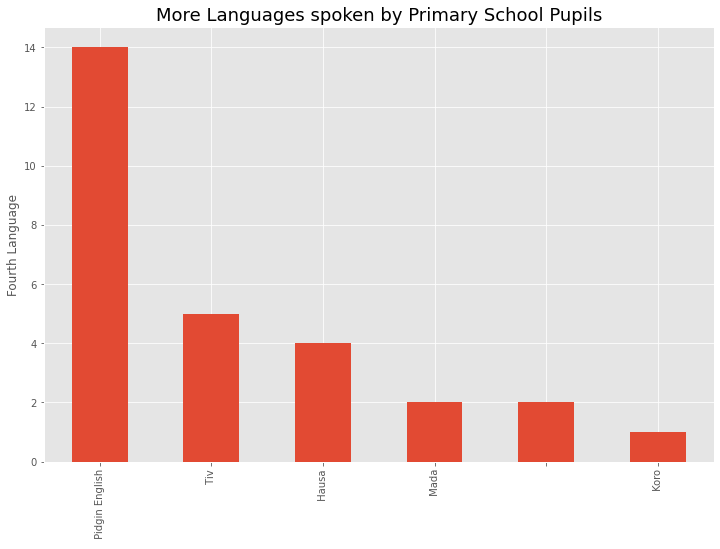

In [41]:
# 6 weeks later...
# Struggling to remember where i was...
# Not even sure where i am!
# and it is now becoming harder and harder to say what it is i am doing!!

lang4plot = dp_ads['Lang4'].value_counts().plot(kind='bar',figsize=(12,8))
lang4plot.set_ylabel('Fourth Language')
lang4plot.set_title('More Languages spoken by Primary School Pupils', fontsize = 18)

In [42]:
# That was a replotting of the last column of the previous split. Hope it will revive the spirit.


In [43]:
# Now the idea is to split the individual pupils and do a matrix:
# i) map pupils with languages spoken
# ii) map pupils with languages spoken other than ENglish and comprehension scores.
#df = df.set_index('ID')
#new_df = pd.DataFrame(np.sum(df.to_numpy()[:, None] 
                             #== np.unique(df.to_numpy())[:, None], axis=2), index=df.index, columns=np.unique(df.to_numpy()))
   #OR
#subset = ['col2', 'col3']
#new_df = pd.DataFrame(np.sum(df[subset].to_numpy()[:, None] == 
#np.unique(df[subset].to_numpy())[:, None], axis=2), index=df.index, columns=np.unique(df[subset].to_numpy()))




#FROM:  https://stackoverflow.com/questions/72019683/make-a-matrix-from-dataframe

In [44]:
#sublang=['Lang2', 'Lang3', 'Lang4']
#sublang

#new_dp_ads = pd.DataFrame(np.sum(dp_ads[sublang].to_numpy()[:, None]==np.unique(dp_ads[sublang].to_numpy())[:, None], axis=2),
                         #columns=np.unique(dp_ads[sublang].to_numpy()))

In [45]:
def count_languages(column):  #to get number of languages in a column
    #global total_num
    total_num = 1
    i = 0
    while column[i] == "English":
        total_num +=1
        i += 1
    print("Number of children speaking English is ", total_num)  
count_languages(['Lang1'])

Number of children speaking English is  1


In [46]:
count_languages(dp_ads['Lang1'])

Number of children speaking English is  34


In [47]:
dp_ads['Lang1'].value_counts()



English    986
             1
Name: Lang1, dtype: int64

In [48]:
dp_ads.corr()

,Serial Number,Year of Entry,Unnamed: 16
Serial Number,1.000000,-0.035698,NaN
Year of Entry,-0.035698,1.000000,NaN
Unnamed: 16,NaN,NaN,NaN


In [49]:
dp_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Serial Number           994 non-null    float64
 1   Date of entry           999 non-null    object 
 2   Gender                  1001 non-null   object 
 3   Languages Spoken        987 non-null    object 
 4   Class                   1004 non-null   object 
 5   Year of Entry           965 non-null    float64
 6   Language with Parents   1002 non-null   object 
 7   Language with Siblings  994 non-null    object 
 8   Language with Friends   1000 non-null   object 
 9   Language in School      993 non-null    object 
 10  First English at        999 non-null    object 
 11  Comprehension 1         982 non-null    object 
 12  Comprehension 2         972 non-null    object 
 13  Comprehension 3         968 non-null    object 
 14  Comprehension 4         958 non-null    

In [50]:
dp_ads.shape


(1005, 26)

In [51]:
#drop the columns that are not helpful
dp_ads.drop(['Unnamed: 16', 'Language with Siblings', 'Language with Friends', 'Language in School'],
  axis='columns', inplace=True)

In [52]:
dp_ads.shape


(1005, 22)

In [53]:
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1001 non-null   object 
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  987 non-null    object 
 14  Lang2                  888 non-null    object 
 15  Lang

In [54]:
dp_ads['Gender'].isnull().any()

True

In [55]:
dp_ads['Gender']=dp_ads['Gender'].dropna()

In [56]:
dp_ads['Gender'].isnull().any()

True

In [57]:
#rainfall['station_name'] = rainfall['station_name'].astype(str)
dp_ads['Gender']=dp_ads['Gender'].astype(str)

In [58]:
# change the categorical values (object) to numerical.
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(dp_ads["Gender"]) 

LabelEncoder()

In [59]:
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   object 
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  987 non-null    object 
 14  Lang2                  888 non-null    object 
 15  Lang

In [60]:
#rainfall['station_name'] = label_encoder.fit_transform(rainfall['station_name'])
dp_ads['Gender'] = label_encoder.fit_transform(dp_ads['Gender'])

In [61]:
dp_ads.head()

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Lang1,Lang2,Lang3,Lang4,Langp_1,Langp_2,Langp_3,Langp_4,Langp_5
0,1.0,17/02/2023,1,"English, Yoruba",5,2018.0,"English, Yoruba",At home,1,1,1,1,1,English,Yoruba,None,None,English,Yoruba,None,None,None
1,2.0,17/02/2023,2,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English",Primary School,1,1,1,1,1,English,Pidgin English,Yoruba,None,English,Pidgin English,None,None,None
2,3.0,17/02/2023,1,"English, Igbo",5,2018.0,"English, Igbo",At home,1,1,1,1,1,English,Igbo,None,None,English,Igbo,None,None,None
3,4.0,17/02/2023,2,"English, Bura, Hausa",4,2019.0,"English, Bura",Play group,1,1,1,1,1,English,Bura,Hausa,None,English,Bura,None,None,None
4,6.0,17/02/2023,2,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi",Primary School,1,1,1,0,1,English,Gbagyi,Pidgin English,None,English,Pidgin English,Gbagyi,None,None


In [62]:
dp_ads['Lang1'].isnull().any()

True

In [63]:
dp_ads['Lang1']=dp_ads['Lang1'].dropna()

In [64]:
dp_ads['Lang1'].isnull().any()

True

In [65]:
dp_ads['Lang1']=dp_ads['Lang1'].astype(str)

In [66]:
dp_ads['Lang1'] = label_encoder.fit_transform(dp_ads['Lang1'])

In [67]:
dp_ads.head()

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Lang1,Lang2,Lang3,Lang4,Langp_1,Langp_2,Langp_3,Langp_4,Langp_5
0,1.0,17/02/2023,1,"English, Yoruba",5,2018.0,"English, Yoruba",At home,1,1,1,1,1,1,Yoruba,None,None,English,Yoruba,None,None,None
1,2.0,17/02/2023,2,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English",Primary School,1,1,1,1,1,1,Pidgin English,Yoruba,None,English,Pidgin English,None,None,None
2,3.0,17/02/2023,1,"English, Igbo",5,2018.0,"English, Igbo",At home,1,1,1,1,1,1,Igbo,None,None,English,Igbo,None,None,None
3,4.0,17/02/2023,2,"English, Bura, Hausa",4,2019.0,"English, Bura",Play group,1,1,1,1,1,1,Bura,Hausa,None,English,Bura,None,None,None
4,6.0,17/02/2023,2,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi",Primary School,1,1,1,0,1,1,Gbagyi,Pidgin English,None,English,Pidgin English,Gbagyi,None,None


In [68]:
# NOTES...
# label encoding not best for ordinal values... Better to use one hot encoding or mapping
# but languages are not really ordinal. They are nominal...
# from 'feature encoding for beginners'...(a) https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5...
#it is best to use one hot encoding "when [1]there aren’t an overwhelming amount of unique values and/or 
#[2] the distribution of unique values is relatively balanced" (a)
# So for the 57 unique langugages following English, it seems mapping may be more ideal :)


#custom_mapping = {'bad': 1, 'good': 2, 'excellent': 3}

#df['rating'] = df['rating'].map(custom_mapping)
#Find unique values in column 'Lang2' and sort alphabetically Map from 2 to 57, since English in Lang1 is 01
dp_ads['Lang2'].isnull().any()


True

In [69]:
dp_ads['Lang2']=dp_ads['Lang2'].dropna()

In [70]:
dp_ads['Lang2'].isnull().any()

True

In [73]:
dp_ads['Lang2']=dp_ads['Lang2'].astype(str)

In [72]:
dp_ads['Lang1'].value_counts()

1    986
2     18
0      1
Name: Lang1, dtype: int64

In [75]:
dp_ads['Lang2'].value_counts().sort_values()

 Ron                 1
 Arago               1
 Adara               1
 Kurama              1
 Kwala?              1
 Katab               1
 Afo                 1
 Kilber              1
 Ganagana            1
 Boju                1
 Ibibio              1
 Ahor                1
 Attakar             1
 Amo                 1
 Ijon                1
 Kwol                1
 Gusawa              1
 Kataf               1
 Chala               1
 Igon                1
 Akwa Ibom           1
 Koro                1
 Margi               1
 Gwandara            1
 Cross River         1
 Bassa Nge           1
 Efik                1
 Bassange            1
 Kaduna              1
 Angas               2
 Ahoe                2
 Ngas                2
 Igede               2
 Nupe                2
 Eggon               2
 Awo                 2
 Tarok               2
 Kantana             2
 Edo                 3
 Chawai              3
Jaba                 3
 Atarkar             3
 Ebira               4
 Bura      

In [78]:
lang_array2=dp_ads['Lang2'].unique()

In [81]:
lang_array2

array([' Yoruba', ' Pidgin English', ' Igbo', ' Bura', ' Gbagyi',
       ' Idoma', ' Ijon', 'nan', ' Hausa', ' Tiv', ' Akwa Ibom', ' Igala',
       ' Amo', ' Tarok', ' Fulfulde', ' Ngas', ' Mada', ' Cross River',
       ' Bassa', ' Eggon', ' Igon', ' Kilber', ' Igede', ' Gede',
       ' Ebira', ' Nupe', ' Jaba', ' Bassange', ' Koro', ' Kantana',
       ' Ganagana', ' Gusawa', 'Jaba', ' Chawai', ' Attakar', ' Kurama',
       ' Bajju', ' Chala', ' Ahor', ' Bassa Nge', ' Afo', ' Arago',
       ' Kwala?', ' Gwandara', ' Kwol', ' Kaduna', ' Edo', ' Angas',
       ' Ahoe', ' Ron', ' Boju', ' Awo', ' Efik', ' Ibibio', ' Kataf',
       ' Adara', ' Atarkar', ' Margi', ' Katab'], dtype=object)

In [96]:
# map second languages using sorted list
dp_ads['Lang2_map'] = dp_ads['Lang2'].map({' Yoruba':'57', ' Pidgin English':'53', ' Igbo':'35',
                                           ' Bura':'17', ' Gbagyi':'27',
                                           ' Idoma':'33', ' Ijon':'38', 'nan':'02', ' Hausa':'31', ' Tiv':'56',
                                           ' Akwa Ibom':'07', ' Igala':'34',' Amo':'08', ' Tarok':'55', ' Fulfulde':'25',
                                           ' Ngas':'51', ' Mada':'49', ' Cross River':'20', ' Bassa':'14', ' Eggon':'24',
                                           ' Igon':'37', ' Kilber':'44', ' Igede':'36', ' Gede':'28',' Ebira':'21', ' Nupe':'52',
                                           ' Jaba':'39', ' Bassange':'15', ' Koro':'45', ' Kantana':'41',
                                           ' Ganagana':'26', ' Gusawa':'29', ' Jaba':'39', ' Chawai':'19', ' Attakar':'12',
                                           ' Kurama':'46',' Bajju':'14', ' Chala':'18', ' Ahor':'06', ' Bassa Nge':'15', 
                                           ' Afo':'04', ' Arago':'10',' Kwala?':'47', ' Gwandara':'30', ' Kwol':'48', ' Kaduna':'40',
                                           ' Edo':'22', ' Angas':'09',' Ahoe':'05', ' Ron':'54', ' Boju':'16', ' Awo':'13', ' Efik':'23',
                                           ' Ibibio':'32', ' Kataf':'43',' Adara':'03', ' Atarkar':'11', ' Margi':'50', ' Katab':'42'}) 

In [97]:
# oh!!! the space was needed... except "nan"
dp_ads.head()


,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Lang1,Lang2,Lang3,Lang4,Langp_1,Langp_2,Langp_3,Langp_4,Langp_5,Lang2_map
0,1.0,17/02/2023,1,"English, Yoruba",5,2018.0,"English, Yoruba",At home,1,1,1,1,1,1,Yoruba,None,None,English,Yoruba,None,None,None,57
1,2.0,17/02/2023,2,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English",Primary School,1,1,1,1,1,1,Pidgin English,Yoruba,None,English,Pidgin English,None,None,None,53
2,3.0,17/02/2023,1,"English, Igbo",5,2018.0,"English, Igbo",At home,1,1,1,1,1,1,Igbo,None,None,English,Igbo,None,None,None,35
3,4.0,17/02/2023,2,"English, Bura, Hausa",4,2019.0,"English, Bura",Play group,1,1,1,1,1,1,Bura,Hausa,None,English,Bura,None,None,None,17
4,6.0,17/02/2023,2,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi",Primary School,1,1,1,0,1,1,Gbagyi,Pidgin English,None,English,Pidgin English,Gbagyi,None,None,27


In [98]:
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   int32  
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  1005 non-null   object 
 14  Lang2                  1005 non-null   object 
 15  Lang

In [99]:
dp_ads['Lang2_map']

0       57
1       53
2       35
3       17
4       27
        ..
1000    56
1001    27
1002    57
1003    27
1004    57
Name: Lang2_map, Length: 1005, dtype: object

In [100]:
dp_ads['Lang2']

0                Yoruba
1        Pidgin English
2                  Igbo
3                  Bura
4                Gbagyi
             ...       
1000                Tiv
1001             Gbagyi
1002             Yoruba
1003             Gbagyi
1004             Yoruba
Name: Lang2, Length: 1005, dtype: object

In [101]:
# to change the data type to numeric.. Lang1, and Lang2_map
# data['b'] = pd.to_numeric(data['b'])
dp_ads['Lang2_map']=pd.to_numeric(dp_ads['Lang2_map'])

In [102]:
dp_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   int32  
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  1005 non-null   object 
 14  Lang2                  1005 non-null   object 
 15  Lang

In [103]:
dp_ads['Lang3']

0                  None
1                Yoruba
2                  None
3                 Hausa
4        Pidgin English
             ...       
1000               None
1001               None
1002               None
1003               None
1004               None
Name: Lang3, Length: 1005, dtype: object

In [104]:
dp_ads['Lang4']

0       None
1       None
2       None
3       None
4       None
        ... 
1000    None
1001    None
1002    None
1003    None
1004    None
Name: Lang4, Length: 1005, dtype: object

In [105]:
dp_ads['Lang3'].value_counts().sort_values()

 Narm               1
 Koro               1
 Gbagyi             2
 Idoma              2
 Mada               3
 Yoruba             6
 Gede              12
 Tiv               12
 Pidgin English    20
 Hausa             78
Name: Lang3, dtype: int64

In [106]:
dp_ads['Lang4'].value_counts().sort_values()

 Koro               1
 Mada               2
                    2
 Hausa              4
 Tiv                5
 Pidgin English    14
Name: Lang4, dtype: int64

In [107]:
# These last two language columns have so few languages...
# Use mapping... same number code for the languages in Lang2
lang_array3=dp_ads['Lang3'].unique()
lang_array3

array([None, ' Yoruba', ' Hausa', ' Pidgin English', nan, ' Gede', ' Tiv',
       ' Idoma', ' Gbagyi', ' Mada', ' Narm', ' Koro'], dtype=object)

In [109]:
#' Narm' looks new ...
dp_ads['Lang3'].isnull().any()

True

In [110]:
dp_ads['Lang3']=dp_ads['Lang3'].dropna()

In [113]:
# map third set of languages using sorted list
dp_ads['Lang3_map'] = dp_ads['Lang3'].map({'None':'02',' Yoruba':'57',' Hausa':'31', ' Pidgin English':'53','nan':'02',' Gede':'28', ' Igbo':'35',
                                           ' Tiv':'56', ' Idoma':'33',' Gbagyi':'27',' Mada':'49',' Narm':'58',' Koro':'45'})
                                           

In [114]:
dp_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   int32  
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  1005 non-null   object 
 14  Lang2                  1005 non-null   object 
 15  Lang

In [115]:
dp_ads['Lang3_map']

0       NaN
1        57
2       NaN
3        31
4        53
       ... 
1000    NaN
1001    NaN
1002    NaN
1003    NaN
1004    NaN
Name: Lang3_map, Length: 1005, dtype: object

In [116]:
# to change the data type to numeric.. Lang1, and Lang2_map and Lang3_map
# data['b'] = pd.to_numeric(data['b'])
dp_ads['Lang3_map']=pd.to_numeric(dp_ads['Lang3_map'])

In [118]:
dp_ads['Lang3_map']

0        NaN
1       57.0
2        NaN
3       31.0
4       53.0
        ... 
1000     NaN
1001     NaN
1002     NaN
1003     NaN
1004     NaN
Name: Lang3_map, Length: 1005, dtype: float64

In [119]:
# These shouldn't be floats....
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   int32  
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  1005 non-null   object 
 14  Lang2                  1005 non-null   object 
 15  Lang

In [121]:
dp_ads['Lang4'].isnull().any()

True

In [122]:
dp_ads['Lang4']=dp_ads['Lang4'].dropna()

In [123]:
Lang_array4=dp_ads['Lang4'].unique()

In [124]:
Lang_array4

array([nan, ' Hausa', ' Mada', ' Tiv', ' Pidgin English', ' Koro', ''],
      dtype=object)

In [125]:
# map fourth set of languages using sorted list
dp_ads['Lang4_map'] = dp_ads['Lang4'].map({'nan':'02',' Hausa':'31',' Mada':'49',' Tiv':'56',' Pidgin English':'53','':'02',
                                           ' Koro':'45'})
                                           

In [126]:
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   int32  
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  1005 non-null   object 
 14  Lang2                  1005 non-null   object 
 15  Lang

In [127]:
# to change the data type to numeric.. Lang1, and Lang2_map and Lang3_map and Lang4_map
# data['b'] = pd.to_numeric(data['b'])
dp_ads['Lang4_map']=pd.to_numeric(dp_ads['Lang4_map'])

In [128]:
dp_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          994 non-null    float64
 1   Date of entry          999 non-null    object 
 2   Gender                 1005 non-null   int32  
 3   Languages Spoken       987 non-null    object 
 4   Class                  1004 non-null   object 
 5   Year of Entry          965 non-null    float64
 6   Language with Parents  1002 non-null   object 
 7   First English at       999 non-null    object 
 8   Comprehension 1        982 non-null    object 
 9   Comprehension 2        972 non-null    object 
 10  Comprehension 3        968 non-null    object 
 11  Comprehension 4        958 non-null    object 
 12  Comprehension 5        959 non-null    object 
 13  Lang1                  1005 non-null   object 
 14  Lang2                  1005 non-null   object 
 15  Lang

In [129]:
#Remove excess columns
dp_ads.shape


(1005, 25)

In [130]:
#drop the columns that are not going to be used...
dp_ads.drop(['Langp_1', 'Langp_2', 'Langp_3', 'Langp_4', 'Langp_5'],axis='columns', inplace=True)

In [131]:
dp_ads.shape

(1005, 20)

In [136]:
# Make other columns numeric...
# to change the data type to numeric...
# data['b'] = pd.to_numeric(data['b'])

#dp_ads['Comprehension 1'] = pd.to_numeric(dp_ads['Comprehension 1'])
dp_ads['Comprehension 1']=dp_ads['Comprehension 1'].dropna()
dp_ads['Comprehension 1'].isnull().any()

True

In [146]:
#df = df.replace([np.nan, -np.inf], 0)
dp_ads[['Comprehension 1', 'Comprehension 2']] = dp_ads[['Comprehension 1', 'Comprehension 2']].dropna()
dp_ads

#dp_ads['Comprehension 1'] = dp_ads['Comprehension 1'].astype('int32')

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Lang1,Lang2,Lang3,Lang4,Lang2_map,Lang3_map,Lang4_map
0,1.0,17/02/2023,1,"English, Yoruba",5,2018.0,"English, Yoruba",At home,1,1,1,1,1,1,Yoruba,NaN,NaN,57.0,NaN,NaN
1,2.0,17/02/2023,2,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English",Primary School,1,1,1,1,1,1,Pidgin English,Yoruba,NaN,53.0,57.0,NaN
2,3.0,17/02/2023,1,"English, Igbo",5,2018.0,"English, Igbo",At home,1,1,1,1,1,1,Igbo,NaN,NaN,35.0,NaN,NaN
3,4.0,17/02/2023,2,"English, Bura, Hausa",4,2019.0,"English, Bura",Play group,1,1,1,1,1,1,Bura,Hausa,NaN,17.0,31.0,NaN
4,6.0,17/02/2023,2,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi",Primary School,1,1,1,0,1,1,Gbagyi,Pidgin English,NaN,27.0,53.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NaN,26-01-2023,1,"English, Tiv",6,NaN,"English, Pidgin English",Primary School,1,1,1,1,1,1,Tiv,NaN,NaN,56.0,NaN,NaN
1001,NaN,26-01-2023,2,"English, Gbagyi",3,2020.0,"English,Gbagyi,Pidgin English, Hausa",Playgroup,NaN,NaN,0,0,0,1,Gbagyi,NaN,NaN,27.0,NaN,NaN
1002,NaN,26-01-2023,1,"English, Yoruba",3,NaN,"English, Hausa, Pidgin English",Playgroup,0,1,0,1,0,1,Yoruba,NaN,NaN,57.0,NaN,NaN
1003,NaN,2023-07-02,2,"English, Gbagyi",3,2020.0,English,Primary School,1,1,1,0,1,1,Gbagyi,NaN,NaN,27.0,NaN,NaN
